## Importing Libraries

In [4]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 

## Exploring MovieLens Dataset

In [5]:
data= pd.read_csv('movies.csv')
data.shape

(27278, 3)

In [9]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
data.tail()

,movieId,title,genres
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


#### Unique Movies

In [11]:
movies = data['movieId'].unique().tolist()
len(movies)

27278

#### Ratings file

In [6]:
ratings_data=pd.read_csv('ratings.csv')
ratings_data.shape

(1048575, 4)

In [15]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [16]:
ratings_data.tail()

,userId,movieId,rating,timestamp
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376
1048574,7120,266,3.5,1175542454


#### Summary of Ratings

In [14]:
ratings_data.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


#### Minimum rating for a movie

In [17]:
ratings_data['rating'].min()

0.5

#### Maximum rating for a movie

In [18]:
ratings_data['rating'].max()

5.0

#### Tags File

In [21]:
tags_data=pd.read_csv('tags.csv')
tags_data.shape

(465564, 4)

In [22]:
tags_data.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [23]:
tags_data.tail()

,userId,movieId,tag,timestamp
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772
465563,138472,923,rise to power,1194037967


#### Unique Tags

In [27]:
unique_tags=tags_data['tag'].unique().tolist()
len(unique_tags)

38643

### Data Cleaning

In [19]:
data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [20]:
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [37]:
del ratings_data['timestamp']

In [24]:
tags_data.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [25]:
tags_data = tags_data.dropna()

In [26]:
tags_data.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

### Data Analysis

In [28]:
comedy_movies = data['genres'].str.contains('Comedy')
data[comedy_movies].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [29]:
drama_movies=data['genres'].str.contains('Drama')
data[drama_movies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [36]:
tag_search = tags_data['tag'].str.contains('science fiction')
tags_data[tag_search].head()

,userId,movieId,tag,timestamp
2189,964,102445,science fiction,1420693910
3090,1629,316,science fiction,1394473952
3655,1629,103306,hard science fiction,1384085034
4391,1678,91500,science fiction,1427654673
4486,1678,112852,science fiction,1418672971


In [38]:
movie_data = data.merge(ratings_data, on = 'movieId', how = 'inner')
movie_data.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5


#### High rated movies

In [41]:
high_rated = movie_data['rating']>4.0
movie_data[high_rated].head()

,movieId,title,genres,userId,rating
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0


#### Low rated movies

In [42]:
low_rated = movie_data['rating']<4.0
movie_data[low_rated].head()

,movieId,title,genres,userId,rating
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,3.0
13,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,1.0
23,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,80,3.0


#### Unique movie genres

In [45]:
len(data['genres'].unique().tolist())

1342

#### Top 25 most rated movies

In [44]:
most_rated = movie_data.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Pulp Fiction (1994)                                                               3498
Forrest Gump (1994)                                                               3476
Silence of the Lambs, The (1991)                                                  3247
Shawshank Redemption, The (1994)                                                  3216
Jurassic Park (1993)                                                              3129
Star Wars: Episode IV - A New Hope (1977)                                         2874
Braveheart (1995)                                                                 2799
Terminator 2: Judgment Day (1991)                                                 2711
Matrix, The (1999)                                                                2705
Schindler's List (1993)                                                           2598
Toy Story (1995)                                                                  2569
Fugitive, The (1993)                 

#### Least 25 rated Movies

In [46]:
least_rated = movie_data.groupby('title').size().sort_values()[:25]
least_rated

title
Koruto wa ore no pasupooto (Colt Is My Passport, A) (1967)    1
Patsy, The (1964)                                             1
Patrice O'Neal: Elephant in the Room (2011)                   1
Cyberbully (2011)                                             1
Pathfinder (Ofelas) (1987)                                    1
Path to War (2002)                                            1
Passport to Pimlico (1949)                                    1
Passionada (2002)                                             1
Passion of Darkly Noon, The (1995)                            1
Passing Strange (2009)                                        1
Passenger Side (2009)                                         1
Party Girl (1958)                                             1
Party 2, The (Boum 2, La) (1982)                              1
Partners (1982)                                               1
Parking (Ting che) (2008)                                     1
Daddy Long Legs (1955)            

In [47]:
data[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


#### Extracting year from title

In [48]:
data['year'] = data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


#### Occurances of each genre

In [49]:
def count_word(df, ref_col, l):
    
    keyword_count = dict()
    
    for s in l: keyword_count[s] = 0
        
    for list_keywords in df[ref_col].str.split('|'):
        if type(list_keywords) == float and pd.isnull(list_keywords): continue
        for s in list_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
                
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
        
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences, keyword_count

In [50]:
genre_labels = set()

for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [53]:
keyword_occurences, key_count_dict = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

### Visualization

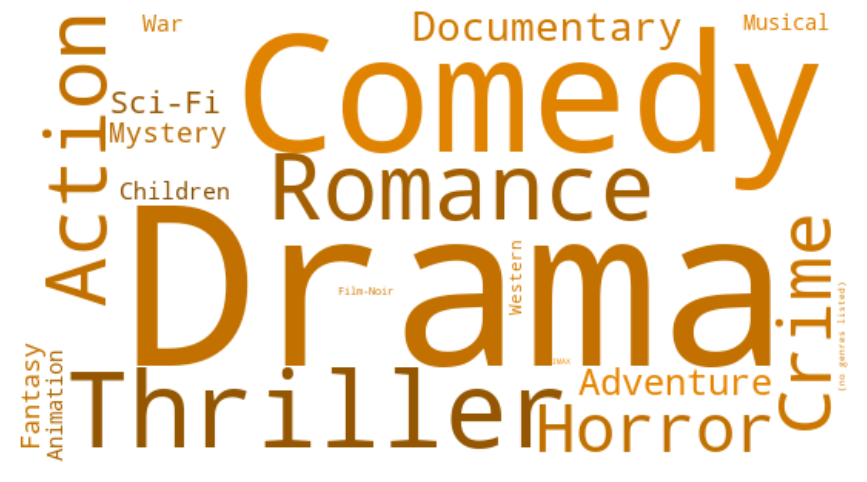

In [61]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 25
# f, ax = plt.subplots(figsize=(14, 6))
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

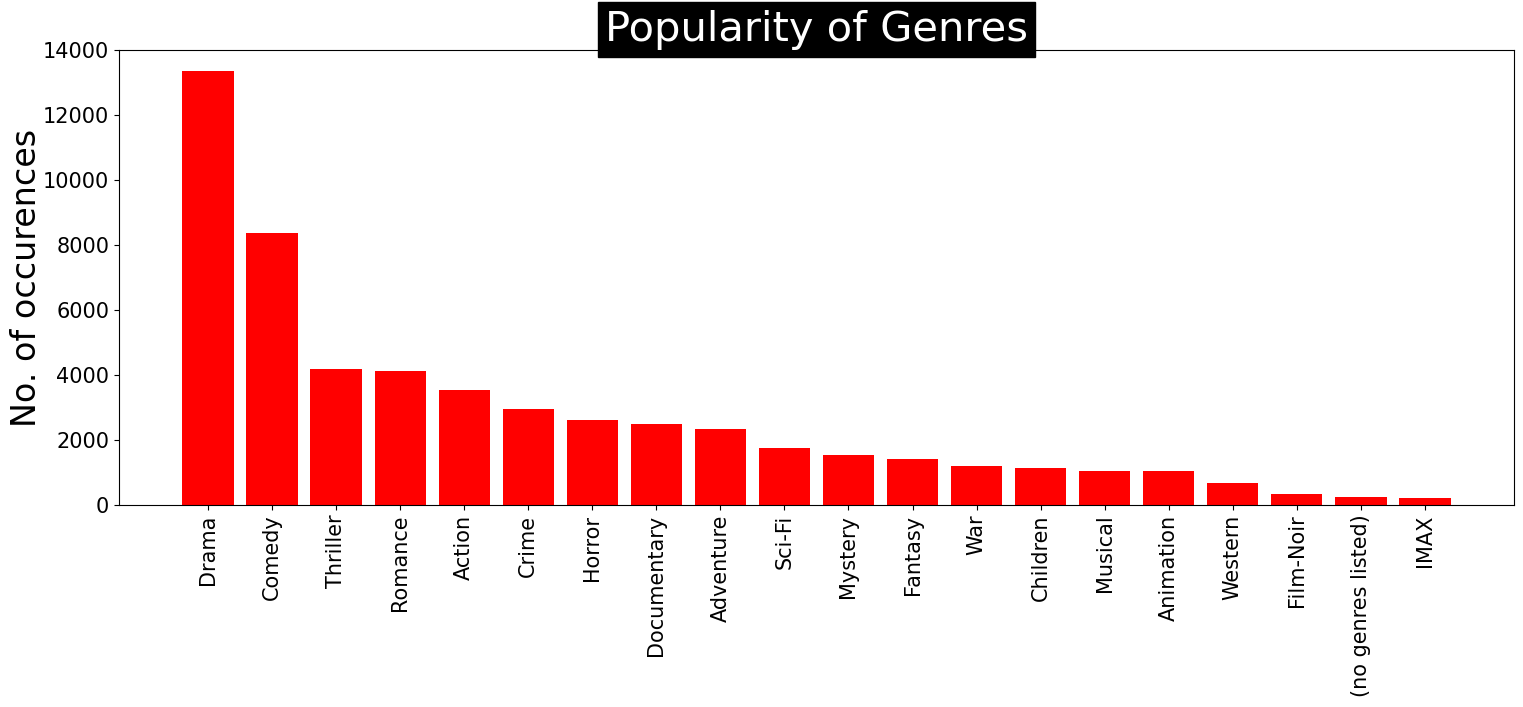

In [63]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)

y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]

plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)

plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)

ax2.bar(x_axis, y_axis, align = 'center', color='r')

plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

In [10]:
# Save the DataFrames as dat files
data.to_csv('movies.dat', sep='\t', index=False)
ratings_data.to_csv('ratings.dat', sep='\t', index=False)